In [74]:
import numpy as np
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import os
import gensim
from gensim import corpora
%matplotlib notebook

In [2]:
stopWords = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

In [3]:
summaryDir = "./Datasets/Summaries"
summaryFiles = os.listdir(summaryDir)

In [4]:
import pandas as pd

In [5]:
documents = []
for sFile in summaryFiles:
    f = open(os.path.join(summaryDir,sFile))
    documents.append(f.read())

In [6]:
data = pd.DataFrame({'Documents':documents})   # Creating data frame for documents

In [7]:
def clean(doc):
    stopFree = " ".join([word for word in doc.lower().split() if word not in stopWords])
    puncFree = "".join([word for word in stopFree if word not in exclude])
    normalized = " ".join([lemma.lemmatize(word) for word in puncFree.split()])
    return normalized

In [8]:
data['Clean Documents'] = data['Documents'].map(clean)

``` Now the Dataframe will contain the documents and their cleaned (normalized versions) with it ```

``` Now creating Bag Of Words on the Dataset ```

In [9]:
# Creating Bag of Words
docsForDict = []
for doc in data['Clean Documents']:
    tokens = doc.split()
    docsForDict.append(tokens)

In [10]:
data['Token Lists'] = docsForDict

In [11]:
dictionary = gensim.corpora.Dictionary(data['Token Lists'])

In [12]:
bagOfWords = [dictionary.doc2bow(doc) for doc in data['Token Lists']]

In [13]:
bagOfWords10 = bagOfWords[10]
for value in bagOfWords10:
    print("Word:",value[0],":",dictionary[value[0]],"appears",value[1],"times.")

Word: 19 : also appears 2 times.
Word: 20 : analysis appears 2 times.
Word: 24 : analyzing appears 1 times.
Word: 26 : argument appears 1 times.
Word: 31 : assumed appears 1 times.
Word: 37 : case appears 1 times.
Word: 51 : consists appears 1 times.
Word: 55 : could appears 1 times.
Word: 67 : every appears 1 times.
Word: 74 : first appears 1 times.
Word: 82 : identifying appears 2 times.
Word: 85 : instance appears 1 times.
Word: 97 : must appears 1 times.
Word: 102 : one appears 1 times.
Word: 103 : order appears 1 times.
Word: 110 : relation appears 1 times.
Word: 115 : respectively appears 1 times.
Word: 117 : result appears 1 times.
Word: 120 : section appears 6 times.
Word: 127 : set appears 6 times.
Word: 131 : since appears 1 times.
Word: 133 : source appears 1 times.
Word: 135 : structure appears 18 times.
Word: 140 : therefore appears 1 times.
Word: 142 : three appears 1 times.
Word: 143 : tree appears 33 times.
Word: 144 : two appears 7 times.
Word: 146 : use appears 2 time

``` Creating the TF-IDF Model on the BagOfWords ```

In [14]:
from gensim import models
tfIdf = models.TfidfModel(bagOfWords)

In [15]:
corpusTfIdf = tfIdf[bagOfWords]

In [16]:
corpusTfIdf[1]

[(6, 0.0063309794583893296),
 (16, 0.011099543936877992),
 (19, 0.002421228796177869),
 (20, 0.01868742373432438),
 (24, 0.015375772155766326),
 (32, 0.01239226965830445),
 (33, 0.026943624664441133),
 (34, 0.016353161128169823),
 (49, 0.03270632225633965),
 (71, 0.027612461987154727),
 (74, 0.0026723718043296864),
 (78, 0.010105509906997061),
 (86, 0.014942186141414869),
 (88, 0.0162216784318173),
 (103, 0.0036171919957734494),
 (104, 0.0045291480354023765),
 (106, 0.002470602369836127),
 (110, 0.09680144478468378),
 (114, 0.022837810655909094),
 (120, 0.004389838269311124),
 (126, 0.006831346925506218),
 (131, 0.003990769958366832),
 (132, 0.03382159122909624),
 (135, 0.0986272557919883),
 (136, 0.006727791412284012),
 (139, 0.0417156560205006),
 (143, 0.019878110868313623),
 (144, 0.0014703738091943028),
 (147, 0.001597109459641685),
 (153, 0.005044640199672259),
 (154, 0.2194466274664879),
 (155, 0.020966215222502447),
 (156, 0.022271768730860037),
 (157, 0.021773533066921084),
 (1

``` Making LDA on Bag Of Words ```

In [17]:
Lda = gensim.models.ldamodel.LdaModel
ldaBow = Lda(bagOfWords,id2word=dictionary,passes=50)

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


In [18]:
ldaBow.print_topics(-1)

[(0,
  '0.062*"word" + 0.026*"rule" + 0.015*"language" + 0.015*"surface" + 0.015*"form" + 0.014*"speech" + 0.014*"twolevel" + 0.014*"sequence" + 0.013*"morphology" + 0.013*"representation"'),
 (1,
  '0.000*"rule" + 0.000*"grammar" + 0.000*"assessment" + 0.000*"term" + 0.000*"language" + 0.000*"data" + 0.000*"task" + 0.000*"feature" + 0.000*"evaluation" + 0.000*"user"'),
 (2,
  '0.042*"default" + 0.035*"sentence" + 0.020*"input" + 0.019*"algorithm" + 0.018*"anaphor" + 0.017*"antecedent" + 0.016*"embedded" + 0.015*"handling" + 0.013*"generation" + 0.012*"focusing"'),
 (3,
  '0.000*"word" + 0.000*"rule" + 0.000*"category" + 0.000*"verb" + 0.000*"tree" + 0.000*"corpus" + 0.000*"one" + 0.000*"set" + 0.000*"unknown" + 0.000*"noun"'),
 (4,
  '0.035*"rule" + 0.028*"semantic" + 0.014*"use" + 0.014*"language" + 0.014*"theory" + 0.014*"higherorder" + 0.014*"logic" + 0.014*"programming" + 0.014*"ccg" + 0.014*"syntax"'),
 (5,
  '0.045*"tree" + 0.035*"decision" + 0.034*"model" + 0.030*"sentence" + 0

``` Making LDA on Tf-Idf Values ```

In [19]:
ldaTfIdf = Lda(corpusTfIdf,id2word=dictionary,passes=50)

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:807: RuntimeWarning: overflow encountered in exp2
  perwordbound, np.exp2(-perwordbound), len(chunk), corpus_words


In [20]:
ldaTfIdf.print_topics(-1)

[(0,
  '0.007*"subordinate" + 0.002*"maximize" + 0.002*"losing" + 0.001*"reduced" + 0.001*"restored" + 0.001*"experiencer" + 0.001*"semanticpragmatic" + 0.001*"observer" + 0.001*"garu" + 0.001*"ensure"'),
 (1,
  '0.005*"attachment" + 0.004*"backedoff" + 0.002*"ibm" + 0.002*"prepositional" + 0.002*"director" + 0.002*"quadruple" + 0.002*"3097" + 0.002*"board" + 0.001*"tuples" + 0.001*"ppattachment"'),
 (2,
  '0.003*"incomplete" + 0.003*"illformed" + 0.002*"completing" + 0.002*"repeated" + 0.002*"collocation" + 0.002*"unified" + 0.002*"modifieemodifier" + 0.002*"consecutive" + 0.001*"complete" + 0.001*"150"'),
 (3,
  '0.014*"vehicle" + 0.006*"car" + 0.006*"presentation" + 0.005*"accident" + 0.004*"operator" + 0.004*"driver" + 0.003*"lane" + 0.003*"subproofs" + 0.003*"presenting" + 0.002*"stopped"'),
 (4,
  '0.010*"morpheme" + 0.008*"fstructure" + 0.008*"syntactic" + 0.008*"object" + 0.007*"recognition" + 0.006*"variable" + 0.006*"scope" + 0.006*"formula" + 0.006*"phoneme" + 0.006*"reading

``` Making Concept Maps ```

In [25]:
conceptMapBow = dict()
conceptWeightsBow = dict()
for tup in ldaBow.print_topics(-1):
    s = tup[1]
    s = s.split('+')
    l = []
    for ele in s:
        l.append(ele[:-1])
    l1 = []
    l2 = []
    for ele in l:
        t = ele.split('"')
        l1.append(t[1])
        l2.append(float(t[0][:-1]))
    conceptMapBow[tup[0]] = l1
    conceptWeightsBow[tup[0]] = l2

In [26]:
conceptMapTfIdf = dict()
conceptWeightsTfIdf = dict()
for tup in ldaTfIdf.print_topics(-1):
    s = tup[1]
    s = s.split('+')
    l = []
    for ele in s:
        l.append(ele[:-1])
    l1 = []
    l2 = []
    for ele in l:
        t = ele.split('"')
        l1.append(t[1])
        l2.append(float(t[0][:-1]))
    conceptMapTfIdf[tup[0]] = l1
    conceptWeightsTfIdf[tup[0]] = l2

In [28]:
print(conceptMapTfIdf)

{0: ['subordinate', 'maximize', 'losing', 'reduced', 'restored', 'experiencer', 'semanticpragmatic', 'observer', 'garu', 'ensure'], 1: ['attachment', 'backedoff', 'ibm', 'prepositional', 'director', 'quadruple', '3097', 'board', 'tuples', 'ppattachment'], 2: ['incomplete', 'illformed', 'completing', 'repeated', 'collocation', 'unified', 'modifieemodifier', 'consecutive', 'complete', '150'], 3: ['vehicle', 'car', 'presentation', 'accident', 'operator', 'driver', 'lane', 'subproofs', 'presenting', 'stopped'], 4: ['morpheme', 'fstructure', 'syntactic', 'object', 'recognition', 'variable', 'scope', 'formula', 'phoneme', 'reading'], 5: ['compositional', 'kanzi', 'collocation', 'compound', 'systematic', 'homomorphism', 'compositionality', 'collocational', 'sea', 'prove'], 6: ['ltag', 'datr', 'lexicalized', 'dative', 'metarule', 'covariation', 'gerald', 'verbnp', 'schabes', 'lkrl'], 7: ['susanne', 'existence', 'presupposition', 'treebank', 'commitment', 'stratified', 'sec', 'existential', 'ca

In [29]:
print(conceptMapBow)

{0: ['word', 'rule', 'language', 'surface', 'form', 'speech', 'twolevel', 'sequence', 'morphology', 'representation'], 1: ['rule', 'grammar', 'assessment', 'term', 'language', 'data', 'task', 'feature', 'evaluation', 'user'], 2: ['default', 'sentence', 'input', 'algorithm', 'anaphor', 'antecedent', 'embedded', 'handling', 'generation', 'focusing'], 3: ['word', 'rule', 'category', 'verb', 'tree', 'corpus', 'one', 'set', 'unknown', 'noun'], 4: ['rule', 'semantic', 'use', 'language', 'theory', 'higherorder', 'logic', 'programming', 'ccg', 'syntax'], 5: ['tree', 'decision', 'model', 'sentence', 'decisiontree', 'parse', 'node', 'question', 'word', 'spatter'], 6: ['error', 'rule', 'vowel', 'surface', 'analysis', 'processing', 'tape', 'pattern', 'root', 'normal'], 7: ['grammar', 'model', 'data', 'training', 'transition', 'algorithm', 'language', 'probability', 'corpus', 'word'], 8: ['inference', 'pragmatic', 'utterance', 'constraint', 'existence', 'presupposition', 'set', 'type', 'logic', 'mo

In [30]:
conceptWeightsBow

{0: [0.062, 0.026, 0.015, 0.015, 0.015, 0.014, 0.014, 0.014, 0.013, 0.013],
 1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 2: [0.042, 0.035, 0.02, 0.019, 0.018, 0.017, 0.016, 0.015, 0.013, 0.012],
 3: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 4: [0.035, 0.028, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014],
 5: [0.045, 0.035, 0.034, 0.03, 0.028, 0.025, 0.016, 0.016, 0.015, 0.015],
 6: [0.118, 0.05, 0.028, 0.02, 0.017, 0.015, 0.015, 0.013, 0.012, 0.011],
 7: [0.045, 0.027, 0.025, 0.022, 0.019, 0.017, 0.016, 0.013, 0.012, 0.011],
 8: [0.03, 0.022, 0.022, 0.02, 0.02, 0.019, 0.016, 0.015, 0.015, 0.013],
 9: [0.087, 0.077, 0.052, 0.028, 0.023, 0.021, 0.021, 0.017, 0.012, 0.012],
 10: [0.046, 0.03, 0.03, 0.024, 0.022, 0.021, 0.02, 0.02, 0.013, 0.012],
 11: [0.034, 0.021, 0.018, 0.017, 0.016, 0.016, 0.016, 0.016, 0.015, 0.012],
 12: [0.043, 0.039, 0.035, 0.032, 0.032, 0.027, 0.024, 0.018, 0.015, 0.015],
 13: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 14

In [32]:
conceptWeightsTfIdf

{0: [0.007, 0.002, 0.002, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001],
 1: [0.005, 0.004, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.001, 0.001],
 2: [0.003, 0.003, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.001, 0.001],
 3: [0.014, 0.006, 0.006, 0.005, 0.004, 0.004, 0.003, 0.003, 0.003, 0.002],
 4: [0.01, 0.008, 0.008, 0.008, 0.007, 0.006, 0.006, 0.006, 0.006, 0.006],
 5: [0.007, 0.007, 0.004, 0.003, 0.002, 0.002, 0.002, 0.001, 0.001, 0.001],
 6: [0.005, 0.004, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001],
 7: [0.005, 0.005, 0.004, 0.004, 0.004, 0.003, 0.003, 0.003, 0.002, 0.002],
 8: [0.012, 0.008, 0.007, 0.006, 0.005, 0.004, 0.004, 0.003, 0.002, 0.002],
 9: [0.007, 0.006, 0.005, 0.005, 0.003, 0.001, 0.001, 0.001, 0.001, 0.001],
 10: [0.005, 0.005, 0.004, 0.004, 0.003, 0.003, 0.003, 0.003, 0.003, 0.002],
 11: [0.008, 0.005, 0.002, 0.002, 0.002, 0.002, 0.001, 0.001, 0.001, 0.001],
 12: [0.004, 0.003, 0.003, 0.002, 0.002, 0.001, 0.001, 0.001, 0.001, 0.001],
 13: [0.0,

## TfIdf Clustering

In [68]:
trainingClusteringTfIdf = conceptWeightsTfIdf.values()
trainingClusteringTfIdf = list(trainingClusteringTfIdf)

In [69]:
trainingClusteringTfIdf

[[0.007, 0.002, 0.002, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001],
 [0.005, 0.004, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.001, 0.001],
 [0.003, 0.003, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.001, 0.001],
 [0.014, 0.006, 0.006, 0.005, 0.004, 0.004, 0.003, 0.003, 0.003, 0.002],
 [0.01, 0.008, 0.008, 0.008, 0.007, 0.006, 0.006, 0.006, 0.006, 0.006],
 [0.007, 0.007, 0.004, 0.003, 0.002, 0.002, 0.002, 0.001, 0.001, 0.001],
 [0.005, 0.004, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001],
 [0.005, 0.005, 0.004, 0.004, 0.004, 0.003, 0.003, 0.003, 0.002, 0.002],
 [0.012, 0.008, 0.007, 0.006, 0.005, 0.004, 0.004, 0.003, 0.002, 0.002],
 [0.007, 0.006, 0.005, 0.005, 0.003, 0.001, 0.001, 0.001, 0.001, 0.001],
 [0.005, 0.005, 0.004, 0.004, 0.003, 0.003, 0.003, 0.003, 0.003, 0.002],
 [0.008, 0.005, 0.002, 0.002, 0.002, 0.002, 0.001, 0.001, 0.001, 0.001],
 [0.004, 0.003, 0.003, 0.002, 0.002, 0.001, 0.001, 0.001, 0.001, 0.001],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],

In [70]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

<IPython.core.display.Javascript object>


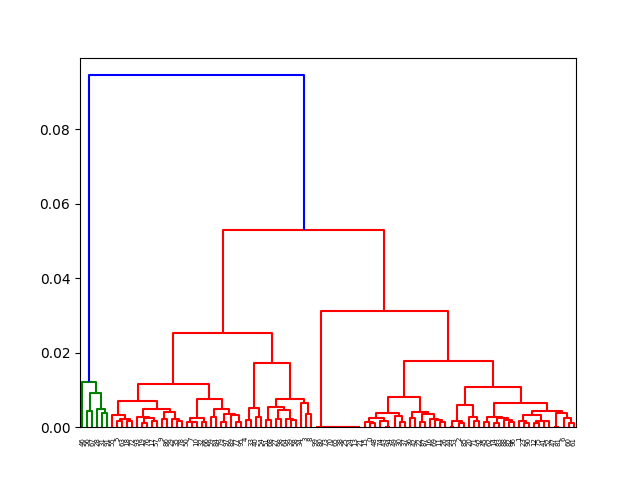

In [75]:
dendrogram = sch.dendrogram(sch.linkage(trainingClusteringTfIdf,method='ward'))

In [76]:
hc = AgglomerativeClustering(n_clusters = 4,affinity = 'euclidean',linkage = 'ward')

In [77]:
clustersTfIdf = hc.fit_predict(trainingClusteringTfIdf)

In [78]:
cluster1TfIdf = []
cluster2TfIdf = []
cluster3TfIdf = []
cluster4TfIdf = []
for i in range(len(trainingClusteringTfIdf)):
    if clustersTfIdf[i] == 0:
        cluster1TfIdf.append(trainingClusteringTfIdf[i])
    elif clustersTfIdf[i] == 1:
        cluster2TfIdf.append(trainingClusteringTfIdf[i])
    elif clustersTfIdf[i] == 2:
        cluster3TfIdf.append(trainingClusteringTfIdf[i])
    elif clustersTfIdf[i] == 3:
        cluster4TfIdf.append(trainingClusteringTfIdf[i])

In [79]:
print("Length of Cluster 1:",len(cluster1TfIdf))
print("Length of Cluster 2:",len(cluster2TfIdf))
print("Length of Cluster 3:",len(cluster3TfIdf))
print("Length of Cluster 4:",len(cluster4TfIdf))

Length of Cluster 1: 41
Length of Cluster 2: 6
Length of Cluster 3: 43
Length of Cluster 4: 10


In [80]:
conceptWeightListTfIdf = list(conceptWeightsTfIdf.values())
conceptWordsListTfIdf = list(conceptMapTfIdf.values())

In [81]:
cluster1WordsTfIdf = []
cluster2WordsTfIdf = []
cluster3WordsTfIdf = []
cluster4WordsTfIdf = []
for vec in cluster1TfIdf:
    ind = conceptWeightListTfIdf.index(vec)
    cluster1WordsTfIdf.append(conceptWordsListTfIdf[ind])
for vec in cluster2TfIdf:
    ind = conceptWeightListTfIdf.index(vec)
    cluster2WordsTfIdf.append(conceptWordsListTfIdf[ind])
for vec in cluster3TfIdf:
    ind = conceptWeightListTfIdf.index(vec)
    cluster3WordsTfIdf.append(conceptWordsListTfIdf[ind])
for vec in cluster4TfIdf:
    ind = conceptWeightListTfIdf.index(vec)
    cluster4WordsTfIdf.append(conceptWordsListTfIdf[ind])

In [82]:
# Only for WordCloud. Total Show-off!
cluster1SentsTfIdf = [' '.join(ele) for ele in cluster1WordsTfIdf]
cluster2SentsTfIdf = [' '.join(ele) for ele in cluster2WordsTfIdf]
cluster3SentsTfIdf = [' '.join(ele) for ele in cluster3WordsTfIdf]
cluster4SentsTfIdf = [' '.join(ele) for ele in cluster4WordsTfIdf]

In [83]:
cluster1SentsTfIdf = ' '.join(cluster1SentsTfIdf)
cluster2SentsTfIdf = ' '.join(cluster2SentsTfIdf)
cluster3SentsTfIdf = ' '.join(cluster3SentsTfIdf)
cluster4SentsTfIdf = ' '.join(cluster4SentsTfIdf)

In [84]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [85]:
# WordCloud for Cluster 1
wordcloud1TfIdf = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(cluster1SentsTfIdf) 

<IPython.core.display.Javascript object>


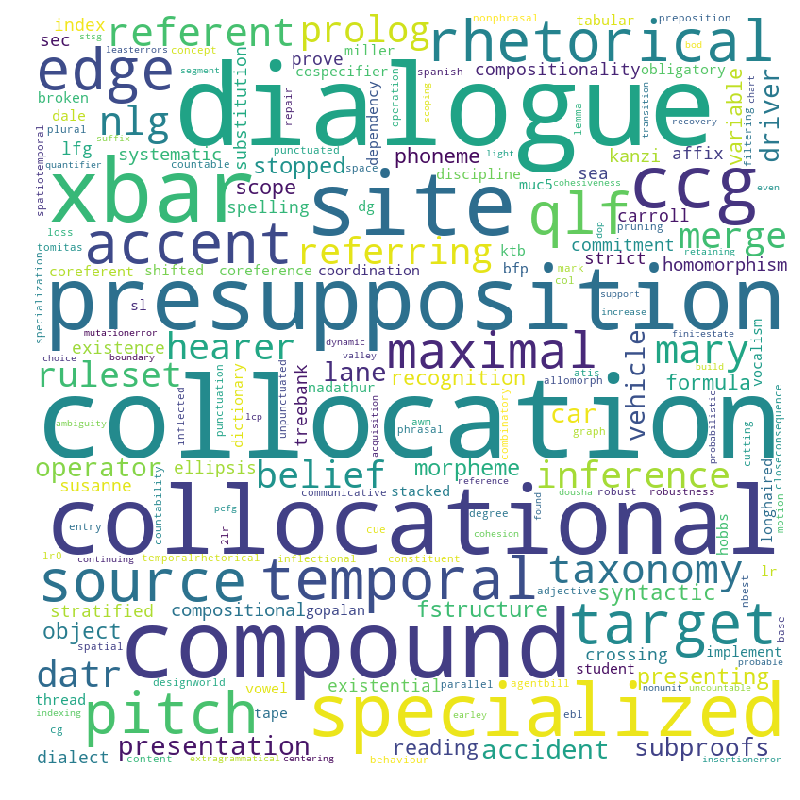

In [86]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud1TfIdf) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

<IPython.core.display.Javascript object>


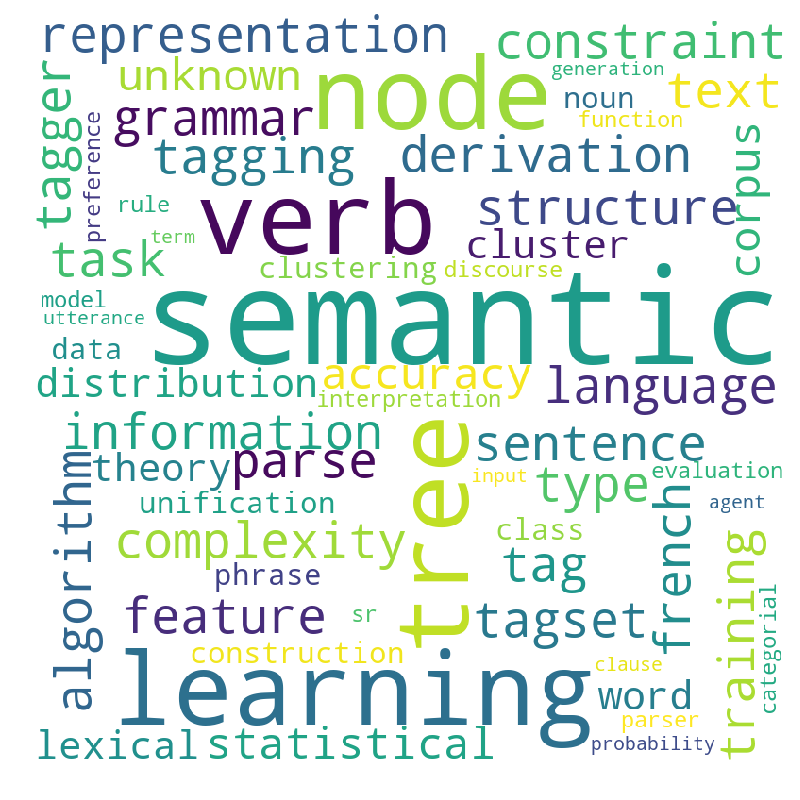

In [88]:
wordcloud2TfIdf = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(cluster2SentsTfIdf) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud2TfIdf) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

<IPython.core.display.Javascript object>


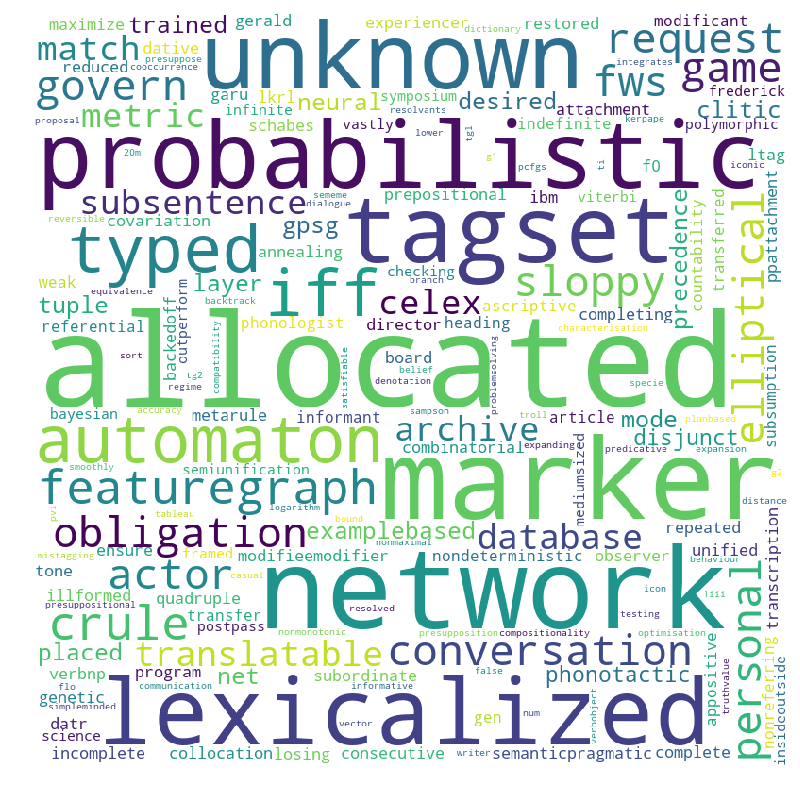

In [89]:
wordcloud3TfIdf = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(cluster3SentsTfIdf) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud3TfIdf) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

<IPython.core.display.Javascript object>


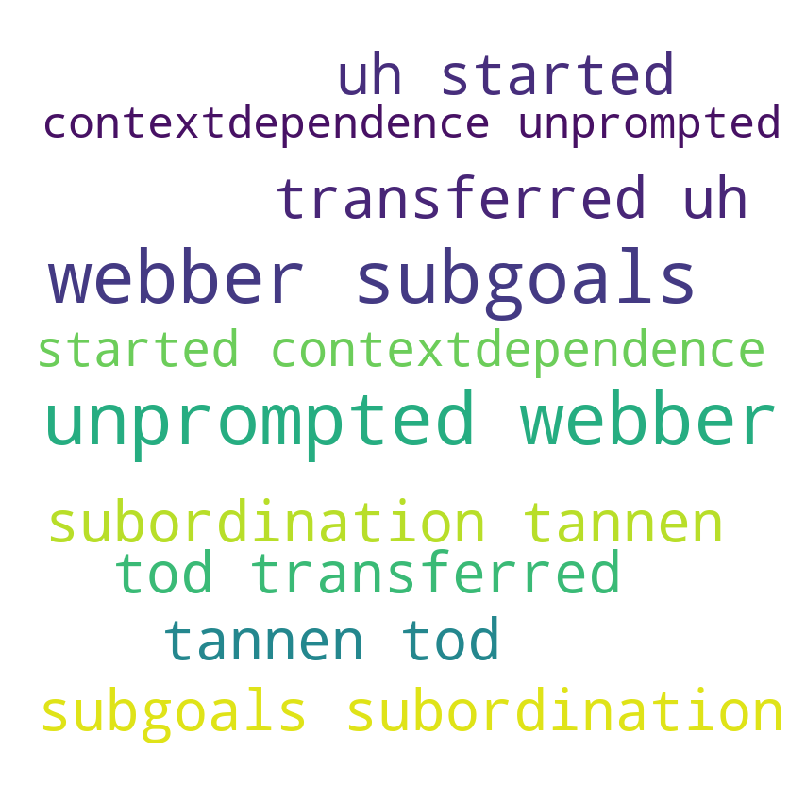

In [90]:
wordcloud4TfIdf = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(cluster4SentsTfIdf) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud4TfIdf) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 